In [9]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

%matplotlib inline

In [10]:
K = 3
D = 2
N = 1000
Ns = [300, 400, 300]

means = 5*np.random.randn(K, D)
x = []
for n, m in zip(Ns, means):
    print(n, m)
    x.append(np.random.randn(n,D) + m)


300 [ 2.48357077 -0.69132151]
400 [3.23844269 7.61514928]
300 [-1.17076687 -1.17068478]


In [3]:
[x_.shape for x_ in x]

[(300, 2), (400, 2), (300, 2)]

In [4]:
m

array([-1.17076687, -1.17068478])

(300, 2) (2,)
(400, 2) (2,)
(300, 2) (2,)


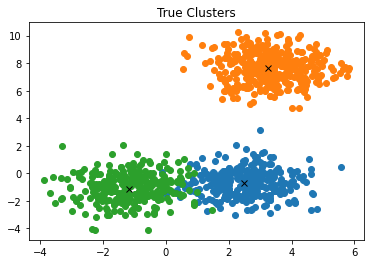

In [14]:
for x_,m in zip(x, means):
    print(x_.shape, m.shape)
    plt.scatter(x_[:,0], x_[:,1])
    plt.plot(m[0], m[1], 'kx')
plt.title('True Clusters')    
plt.show()

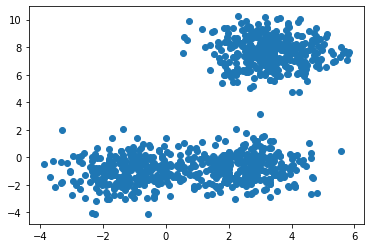

(1000, 2)

In [13]:
data = np.vstack(x)
plt.scatter(data[:,0], data[:,1])
plt.show()
data.shape

In [33]:
def distance_matrix(x, m):
    """
    Calculates the distance from each element x to each element in m.
    Parameters:
    - x: data points
    - m: possible means
    Returns:
    - distance matrix
    """
    d = np.zeros((len(x), len(m)))
    for i in range(len(x)):
        for j in range(len(m)):
            d[i, j] = dist(x[i,:], m[j,:])
            
    return d

def dist(x1, x2, axis=None):
    """
    Calculate euclidean distance
    """
    return np.sqrt(np.sum(np.square(x1-x2), axis))

Test out the distance matrix algorithm

In [34]:
x_test = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
distance_matrix(x_test, x_test)

array([[0.        , 1.41421356, 1.        , 1.        ],
       [1.41421356, 0.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 1.41421356],
       [1.        , 1.        , 1.41421356, 0.        ]])

## broadcasting

In [37]:
def dist(x1, x2, axis=-1):
    """
    Calculate euclidean distance
    """
    # breakpoint()
    return np.sqrt(np.sum(np.square(x1-x2), axis))

def distance_matrix2(x, m):
    # breakpoint()
    d = [dist(x, m_, axis=1) for m_ in m]
    d = np.stack(d, axis=1)

    return d

In [38]:
distance_matrix2(x_test, x_test)

array([[0.        , 1.41421356, 1.        , 1.        ],
       [1.41421356, 0.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 1.41421356],
       [1.        , 1.        , 1.41421356, 0.        ]])

K-means algorithm

In [12]:
data.shape

(1000, 2)

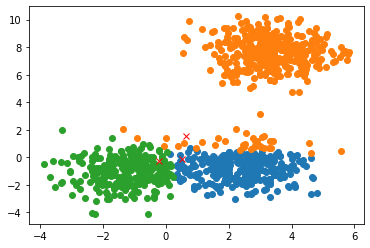

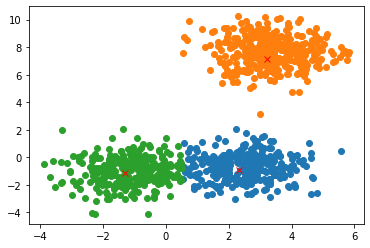

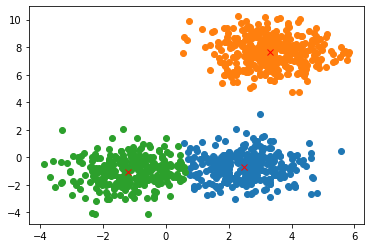

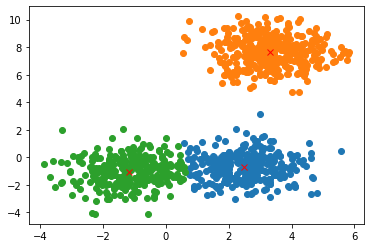

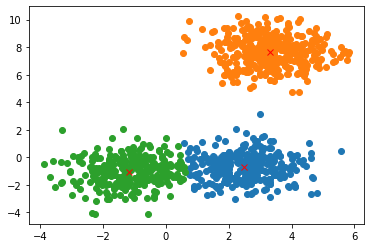

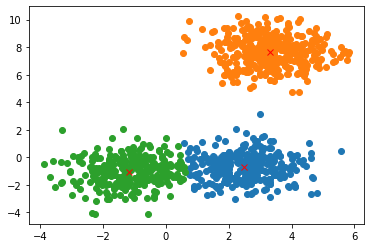

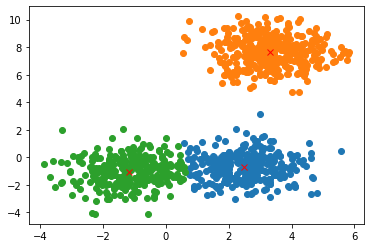

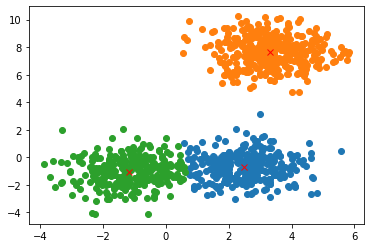

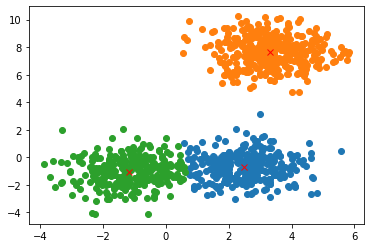

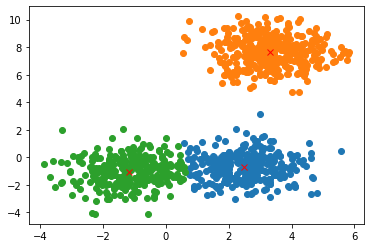

In [42]:
k = 3
iters = 10
np.random.seed(42)
means = np.random.randn(k, data.shape[1])
for i in range(iters):
    d = distance_matrix(data, means)
    # breakpoint()
    cluster = d.argmin(axis=-1)
    for j in range(k):
        idx = cluster == j
        plt.plot(means[j, 0], means[j, 1], "rx")
        plt.scatter(data[idx, 0], data[idx, 1])
        # calculate new mean
        means[j, :] = data[idx].mean(axis=0)
    plt.show()

In [19]:
j

0